# Introduction

This notebook shows the different steps taken to clean the results of the [2017 RSE UK Survey](https://github.com/softwaresaved/international-survey/blob/master/analysis/results_uk_2017_narrative.ipynb). 
In short, participants were drop if:
1. They were not from UK
2. They did not answer more than one page of question

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The total participants were 432. It means that any participants that landed on the page. They are all included in the raw dataset and this is therefore equal to the size of the initial dataset.

In [2]:
df = pd.read_csv('./data/raw_data.csv')
full_size = len(df)
print('There is a total of {} participants to the survey, prior to any cleaning'.format(full_size))

There is a total of 432 participants to the survey, prior to any cleaning


However, some participants dropped before the end of the survey. 
The survey was divided in 7 pages of question plus a welcoming screen (which is labelled '0' in the following table and plot). 
In the following table, it shows what was the last page a participant reached.

In [3]:
last_page = df[df["lastpage. Last page"] != -1.0]["lastpage. Last page"].value_counts(dropna=False).to_frame()
last_page.columns = ['Count']
last_page.index.name = 'Last page reached'
last_page['Percentage'] = round(last_page['Count'] / last_page['Count'].sum() *100)
last_page.sort_index(inplace=True)
last_page

,Count,Percentage
Last page reached,,
0,73,17.0
1,27,6.0
2,10,2.0
3,17,4.0
4,12,3.0
6,4,1.0
7,289,67.0


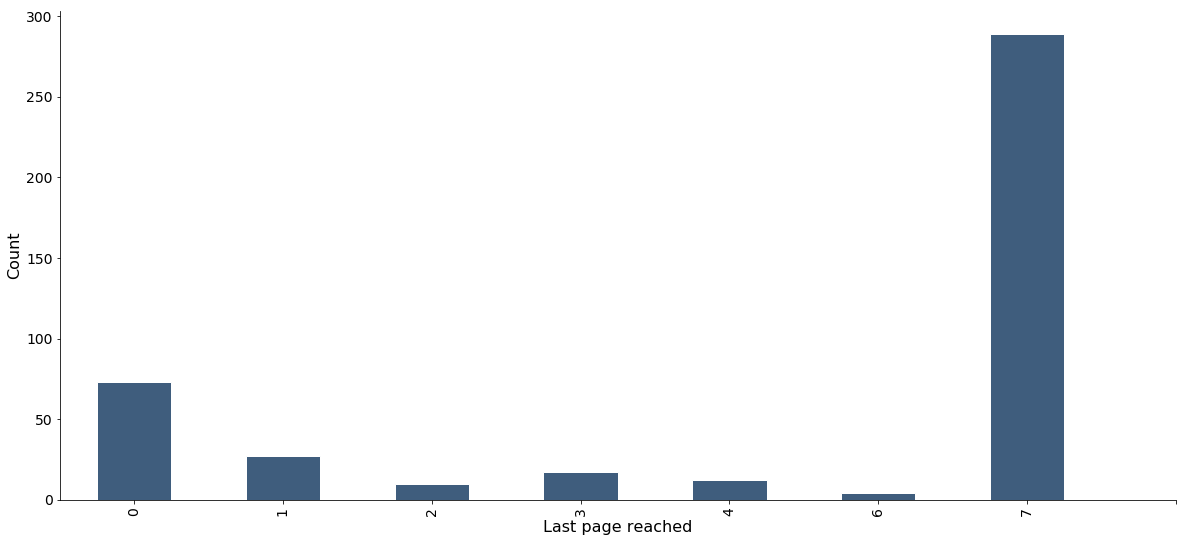

In [4]:
# Creating the figure
plt.figure(figsize=(20, 9))    
ax = plt.subplot(111)  
last_page['Count'].plot(kind='bar', color="#3F5D7D", ec='white')
# Removing the edge lines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Setting up the x and y axis
plt.xticks(range(0, 8, 1), fontsize=14)  
plt.yticks(fontsize=14)  

# Labelling the axis
plt.xlabel("Last page reached", fontsize=16)  
plt.ylabel("Count", fontsize=16)

plt.show()

We can see that a vast majority of the participants did complete the survey (67%). The drop of participants occurs principally at the welcoming message. Therefore we decided to keep any participant that reach at least the first page of questions.

In [5]:
after_first_page = len(df[df["lastpage. Last page"] > 1.0])
print('There is a total of {} participants that at least reached the first page of questions'.format(after_first_page))

There is a total of 332 participants that at least reached the first page of questions


# Country
Some participants may have completed the survey even if they were not from United Kingdom. As the study is only for that country, they need to be removed.
Here a table showing from which country the participants come from.

In [6]:
country = df.iloc[:, 7]
count_countries = country.value_counts(dropna=False).to_frame()
count_countries.columns = ['Count']
count_countries.index.name = 'Country'
count_countries['Percentage'] = round(count_countries['Count'] / count_countries['Count'].sum() *100)
count_countries

,Count,Percentage
Country,,
United Kingdom,270,62.0
NaN,73,17.0
Germany,29,7.0
United States,19,4.0
New Zealand,9,2.0
France,5,1.0
Netherlands,3,1.0
Ireland,3,1.0
Australia,3,1.0


In [7]:
size_with_uk_only = len(df[(df.iloc[:,7] != 'United Kingdom')])
print('There is a total of {} countries that are not United Kingdom'.format(size_with_uk_only))

There is a total of 162 countries that are not United Kingdom


In [8]:
final_size = len(df[(df.iloc[:,7] == 'United Kingdom') & (df["lastpage. Last page"] > 1.0)])
print('The final number of participants, after removing the ones that dropped early and the ones that are not from United Kingdom is {}'.format(final_size))

The final number of participants, after removing the ones that dropped early and the ones that are not from United Kingdom is 253


In [9]:
>>> d = {'col1': [1, 2], 'col2': [3, 4]}
>>> df = pd.DataFrame(data=d)
#d = {'full size dataset': full_size, 'dataset without leavers': after_first_page, 'dataset without other countries': size_with_uk_only, 'final cleaned dataset': final_size}
d = {'Size of different dataset': [full_size, after_first_page, size_with_uk_only, final_size]}
comparison_sizes = pd.DataFrame(data=d)
comparison_sizes.index = ['full size dataset','dataset without leavers','dataset without other countries', 'final cleaned dataset']
comparison_sizes

,Size of different dataset
full size dataset,432
dataset without leavers,332
dataset without other countries,162
final cleaned dataset,253


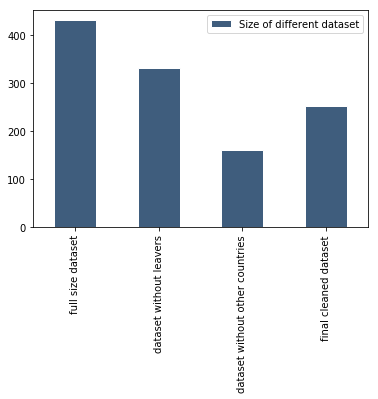

In [20]:
# Creating the figure 
comparison_sizes.plot(kind='bar', color="#3F5D7D", ec='white')
plt.show()

In [11]:
# asserting the size of the filtered df and the recorded cleaned df
cleaned_df = pd.read_csv('data/cleaned_data.csv')
assert(final_size == len(cleaned_df))